In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.metrics import binary_crossentropy

import sys
sys.path.append('../')
from supervised import LogisticRegression
from unsupervised.clustering import KMeans
from metrics import accuracy_score
from utils import generate_dataset_for_classification


CLASS_COLORS = {0: 'purple', 1: 'yellow'}

/Users/johnhenryrudden/anaconda3/envs/ml_mono/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Goals of this notebook

For this notebook, I hope to compare my own implementation of Logistic Regression with one implemented by scikit-learn. Although, before I do this I need some data to work with. I will start with a simple linearly separable example, then will move to a more complex example.

### Creating our dataset

I am not really sure the optimal approach to generating a dataset for classification. So, why not try a super naive yet simple approach.

__IMPLEMENTATION 1:__
Randomly init n centroids and generate points around each centroid using a normal distribution. Then, assign each point a label based on the centroid it is closest to (Use KMeans here). This last point is to remove overlap of data which will help for separability later.

See `data_utils.py` for implementation.


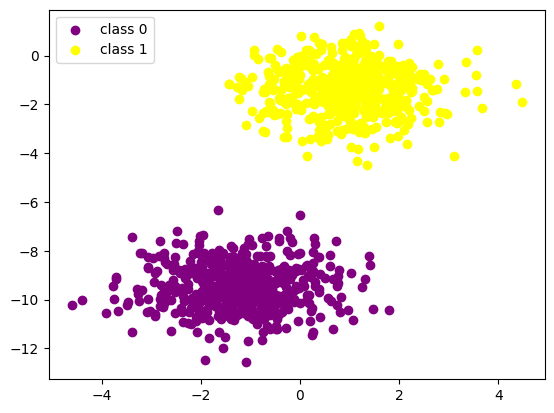

In [2]:
X, y = generate_dataset_for_classification(1000, 2, 2, center_box=(-10,10), random_state=2)

for c in np.unique(y):
    plt.scatter(X[y==c, 0], X[y==c, 1], c=CLASS_COLORS[c], label=f'class {c}')
plt.legend()
plt.show()

### Create Training and Test sets

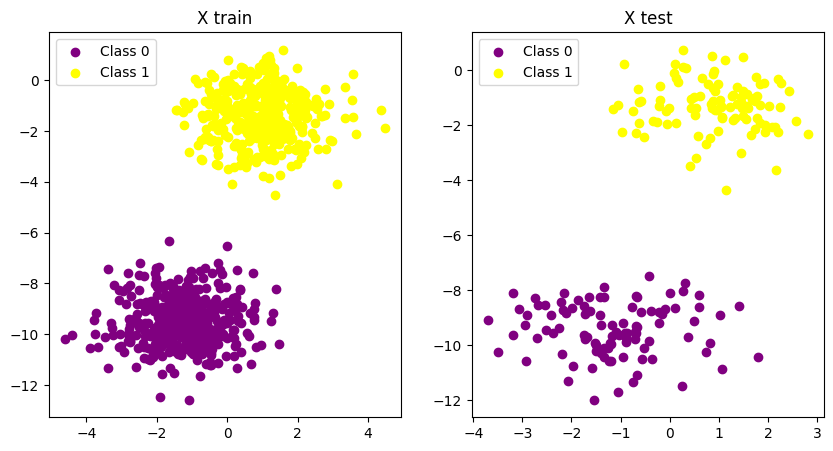

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Plot X train and X test
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
class_colors = {0: 'purple', 1: 'yellow'}

# Loop over each class and plot for both train and test sets
for class_value in [0, 1]:
    # Plot for X_train
    ax[0].scatter(X_train[y_train == class_value, 0], 
                  X_train[y_train == class_value, 1], 
                  color=CLASS_COLORS[class_value], 
                  label=f'Class {class_value}')
    
    # Plot for X_test
    ax[1].scatter(X_test[y_test == class_value, 0], 
                  X_test[y_test == class_value, 1], 
                  color=CLASS_COLORS[class_value], 
                  label=f'Class {class_value}')

ax[0].set_title("X train")
ax[0].legend()
ax[1].set_title("X test")
ax[1].legend()
plt.show()

In [4]:
# TODO: Need more descriptive explanation of Logistic Regression
# Logistic Regression is learning a linear function that separates the data
# But the goal is really a decision boundary that separates the data that has a probability of 0.5 of being in either class

### Training time

Now that we have some classification data, it is time to a Logistic Regression model to try to accurately classify the data!

#### How does Logistic Regression work?

Logistic Regression models work by learning the probability that any given sample belongs to a certain class. In the binary case, we can visualize the role of Logistic Regression as learning to draw a line that separates samples of one class from another. Coontinuing our binary example, we want to draw a line s.t. every sample above the line is classified as one class and every sample below the line is classified as the other class.

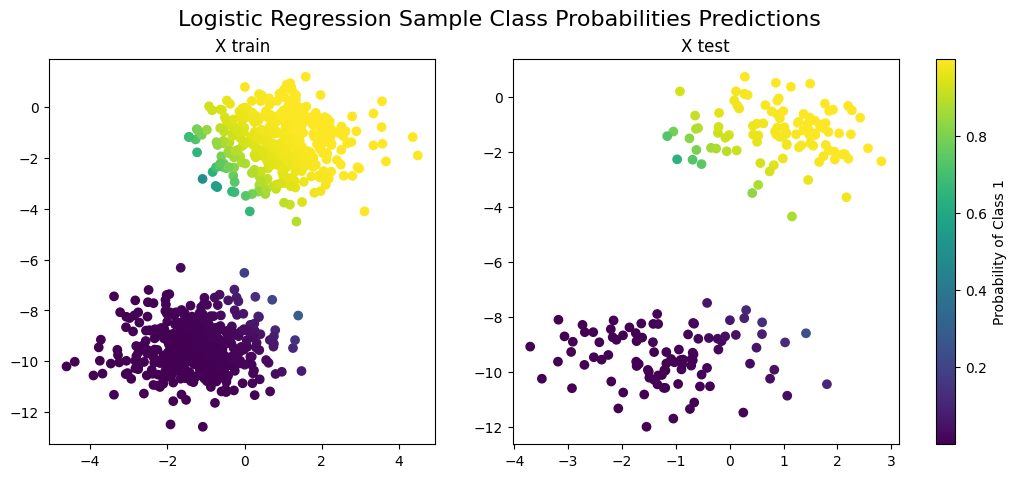

In [5]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)

prob_preds_train = my_logreg.predict_proba(X_train)
prob_preds_test = my_logreg.predict_proba(X_test)

# Plot predictions use example above
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Adjusted figsize for better layout
scatter1 = ax[0].scatter(X_train[:, 0], X_train[:, 1], c=prob_preds_train, cmap='viridis')
ax[0].set_title("X train")
scatter2 = ax[1].scatter(X_test[:, 0], X_test[:, 1], c=prob_preds_test, cmap='viridis')
ax[1].set_title("X test")

# Normalize the color scale
norm = Normalize(vmin=0.0, vmax=1.0)

# Create a colorbar for the entire figure
cbar = fig.colorbar(scatter1, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Probability of Class 1')
fig.suptitle("Logistic Regression Sample Class Probabilities Predictions", size=16)
plt.show()

In [6]:
preds_train = my_logreg.predict(X_train)
preds_test = my_logreg.predict(X_test)

acc_train = accuracy_score(y_train, preds_train)
acc_test = accuracy_score(y_test, preds_test)

print(f"Accuracy train: {acc_train}")
print(f"Accuracy test: {acc_test}")

Accuracy train: 0.99875
Accuracy test: 1.0
